# **Multiclass Clasification Predict Diabetes CASION**

**Context:**

Diabetes adalah kondisi kesehatan kronis yang memengaruhi cara tubuh Anda mengubah makanan menjadi energi. Ada tiga jenis utama diabetes: tipe 1, tipe 2, dan diabetes gestasional. 
- Diabetes tipe 1 adalah penyakit autoimun yang menyebabkan tubuh Anda menyerang sel-sel dalam pankreas yang 
memproduksi insulin. Insulin adalah hormon yang membantu tubuh Anda menggunakan glukosa sebagai energi. 
- Diabetes tipe 2 adalah jenis diabetes yang paling umum. Ini terjadi ketika tubuh Anda tidak merespons secara 
normal terhadap insulin, atau ketika tubuh Anda tidak memproduksi cukup insulin. 
- Diabetes gestasional adalah jenis diabetes yang berkembang selama kehamilan. Biasanya akan hilang setelah bayi 
lahir.

**Prevalensi Diabetes:**

Menurut CDC BRFSS 2021, 34,1 juta orang dewasa di Amerika Serikat mengidap diabetes, atau 10,5% dari populasi orang dewasa. Jumlah ini terus meningkat dari waktu ke waktu. Pada tahun 2010, 29,1 juta orang dewasa di Amerika Serikat mengidap diabetes, atau 9,3% dari populasi orang dewasa. 

**Isi Dataset:**

Sistem Pengawasan Faktor Risiko Perilaku (BRFSS) adalah survei telepon berbasis negara bagian yang sedang berlangsung yang mengumpulkan data tentang perilaku berisiko terkait kesehatan, kondisi kesehatan kronis, dan penggunaan layanan pencegahan di antara orang dewasa berusia 18 tahun ke atas yang tinggal di Amerika Serikat. Dilaksanakan setiap tahun oleh Pusat Pengendalian dan Pencegahan Penyakit (CDC), BRFSS telah memberikan wawasan yang berharga tentang status kesehatan dan perilaku orang dewasa AS sejak didirikan pada tahun 1984. Untuk dataset ini, digunakan csv dari dataset BRFSS 2021 yang tersedia Kaggle. diabetes_012_indikator_kesehatan_BRFSS2021.csv adalah set data bersih dari 236.378 tanggapan survei terhadap BRFSS2021 CDC. Variabel target Diabetes_012 memiliki 3 kelas: 

1. 0 untuk tidak ada diabetes atau hanya selama kehamilan, 
2. 1 untuk pradiabetes, dan  
3. 2 untuk diabetes.  

Penting untuk ditegaskan kembali bahwa saya tidak membuat dataset ini, ini hanyalah dataset yang telah dibersihkan dan dikonsolidasikan yang dibuat dari dataset BRFSS 2021 yang sudah ada di Kaggle. Dataset tersebut dapat ditemukan https://www.kaggle.com/datasets/dariushbahrami/cdc-brfss-survey-2021 dan buku catatan yang saya gunakan untuk membersihkan data dapat ditemukan https://www.kaggle.com/code/julnazz/diabetes-prediction-data-preprocessing/notebook

Import libary

In [28]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Deep learning with TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Hyperparameter tuning
from kerastuner import HyperModel, RandomSearch

# Standard library saving model
import joblib
import json

sns.set_theme(style="darkgrid")

In [5]:
data = pd.read_csv('../Data/diabetes_012_health_indicators_BRFSS2021.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


## **Exploration Data Analyst**

Dataset Overview
- Total Entries: 236,378
- Total Columns: 22

Column Descriptions and Insights:

1. Diabetes_012: Status diabetes (kemungkinan 0 untuk tidak diabetes, 1 untuk pradiabetes, 2 untuk diabetes)
2. HighBP: Kehadiran tekanan darah tinggi (biner, 0 untuk tidak, 1 untuk ya)
3. HighChol: Kehadiran kolesterol tinggi (biner, 0 untuk tidak, 1 untuk ya)
4. CholCheck: Apakah kolesterol telah diperiksa (biner, 0 untuk tidak, 1 untuk ya)
5. BMI: Indeks Massa Tubuh (kontinu)
6. Smoker: Status merokok (biner, 0 untuk tidak, 1 untuk ya)
7. Stroke: Riwayat stroke (biner, 0 untuk tidak, 1 untuk ya)
8. HeartDiseaseorAttack: Riwayat penyakit jantung atau serangan jantung (biner, 0 untuk tidak, 1 untuk ya)
9. PhysActivity: Status aktivitas fisik (biner, 0 untuk tidak, 1 untuk ya)
10. Fruits: Frekuensi konsumsi buah (biner, 0 untuk tidak, 1 untuk ya)
11. Veggies: Frekuensi konsumsi sayuran (biner, 0 untuk tidak, 1 untuk ya)
12. HvyAlcoholConsump: Konsumsi alkohol berlebihan (biner, 0 untuk tidak, 1 untuk ya)
13. AnyHealthcare: Akses ke segala bentuk perawatan kesehatan (biner, 0 untuk tidak, 1 untuk ya)
14. NoDocbcCost: Tidak dapat melihat dokter karena biaya (biner, 0 untuk tidak, 1 untuk ya)
15. GenHlth: Peringkat kesehatan umum (diskrit, kemungkinan dari 1 (buruk) hingga 5 (sangat baik))
16. MentHlth: Jumlah hari kesehatan mental yang buruk dalam sebulan terakhir (kontinu)
17. PhysHlth: Jumlah hari kesehatan fisik yang buruk dalam sebulan terakhir (kontinu)
18. DiffWalk: Kesulitan berjalan atau menaiki tangga (biner, 0 untuk tidak, 1 untuk ya)
19. Sex: Jenis kelamin (biner, 0 untuk perempuan, 1 untuk laki-laki)
20. Age: Kelompok usia (diskrit, kemungkinan dikodekan)
21. Education: Tingkat pendidikan (diskrit, kemungkinan dikodekan)
22. Income: Tingkat pendapatan (diskrit, kemungkinan dikodekan)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [7]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.307791,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.705037,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


**Overall Insight:**

1. Status Kesehatan: Sebagian besar populasi memiliki kondisi kronis seperti tekanan darah tinggi dan kolesterol tinggi, dengan persentase yang cukup tinggi yang pernah menderita penyakit jantung atau stroke.
- 42% memiliki tekanan darah tinggi.
- 40% memiliki kolesterol tinggi. 
- 9% memiliki riwayat penyakit jantung atau serangan jantung. 
- 4% memiliki riwayat stroke.

2. Faktor Gaya Hidup: Tingkat merokok dan aktivitas fisik yang tinggi. Konsumsi buah dan sayuran relatif tinggi, yang merupakan hal positif.
- 41% adalah perokok.
- 78% aktif secara fisik.
- 62% mengonsumsi buah secara teratur.
- 74% mengonsumsi sayuran secara teratur.
- 7% adalah konsumen alkohol berlebihan.

3. Akses Kesehatan: Mayoritas penduduk memiliki akses ke layanan kesehatan, meskipun biaya merupakan penghalang bagi sebagian kecil orang.
- 96% memiliki akses ke perawatan kesehatan.
- 6% tidak bisa mengunjungi dokter karena biaya.

4. Kesehatan Mental dan Fisik: Terdapat sejumlah besar laporan tentang kesehatan mental dan fisik yang buruk, yang mengindikasikan area potensial untuk intervensi kesehatan masyarakat.
- Rata-rata, orang melaporkan hampir 4 hari kesehatan mental yang buruk per bulan.
- Rata-rata, orang melaporkan hampir 4 hari kesehatan fisik yang buruk per bulan.

5. Demografi: Populasi penduduk terbagi secara merata antara jenis kelamin, memiliki demografi paruh baya, dengan tingkat pendidikan yang baik dan distribusi pendapatan menengah.
- Populasi terbagi rata antara laki-laki (48%) dan perempuan (52%).
- Kelompok usia rata-rata menunjukkan populasi paruh baya.
- Tingkat pendidikan rata-rata relatif tinggi.
- Tingkat pendapatan rata-rata menunjukkan populasi berpendapatan menengah.

In [8]:
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Terlihat bahwa tidak terdapat data yang hilang

In [9]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outliers[column] = outlier_indices
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(data)

# Print outliers
for column, outlier_indices in outliers.items():
    print(f"{column}: {len(outlier_indices)} outliers")

Diabetes_012: 39187 outliers
HighBP: 0 outliers
HighChol: 0 outliers
CholCheck: 8664 outliers
BMI: 6314 outliers
Smoker: 0 outliers
Stroke: 9195 outliers
HeartDiseaseorAttack: 20458 outliers
PhysActivity: 52185 outliers
Fruits: 0 outliers
Veggies: 40712 outliers
HvyAlcoholConsump: 14675 outliers
AnyHealthcare: 8847 outliers
NoDocbcCost: 15066 outliers
GenHlth: 8792 outliers
MentHlth: 29178 outliers
PhysHlth: 38580 outliers
DiffWalk: 36390 outliers
Sex: 0 outliers
Age: 0 outliers
Education: 0 outliers
Income: 0 outliers


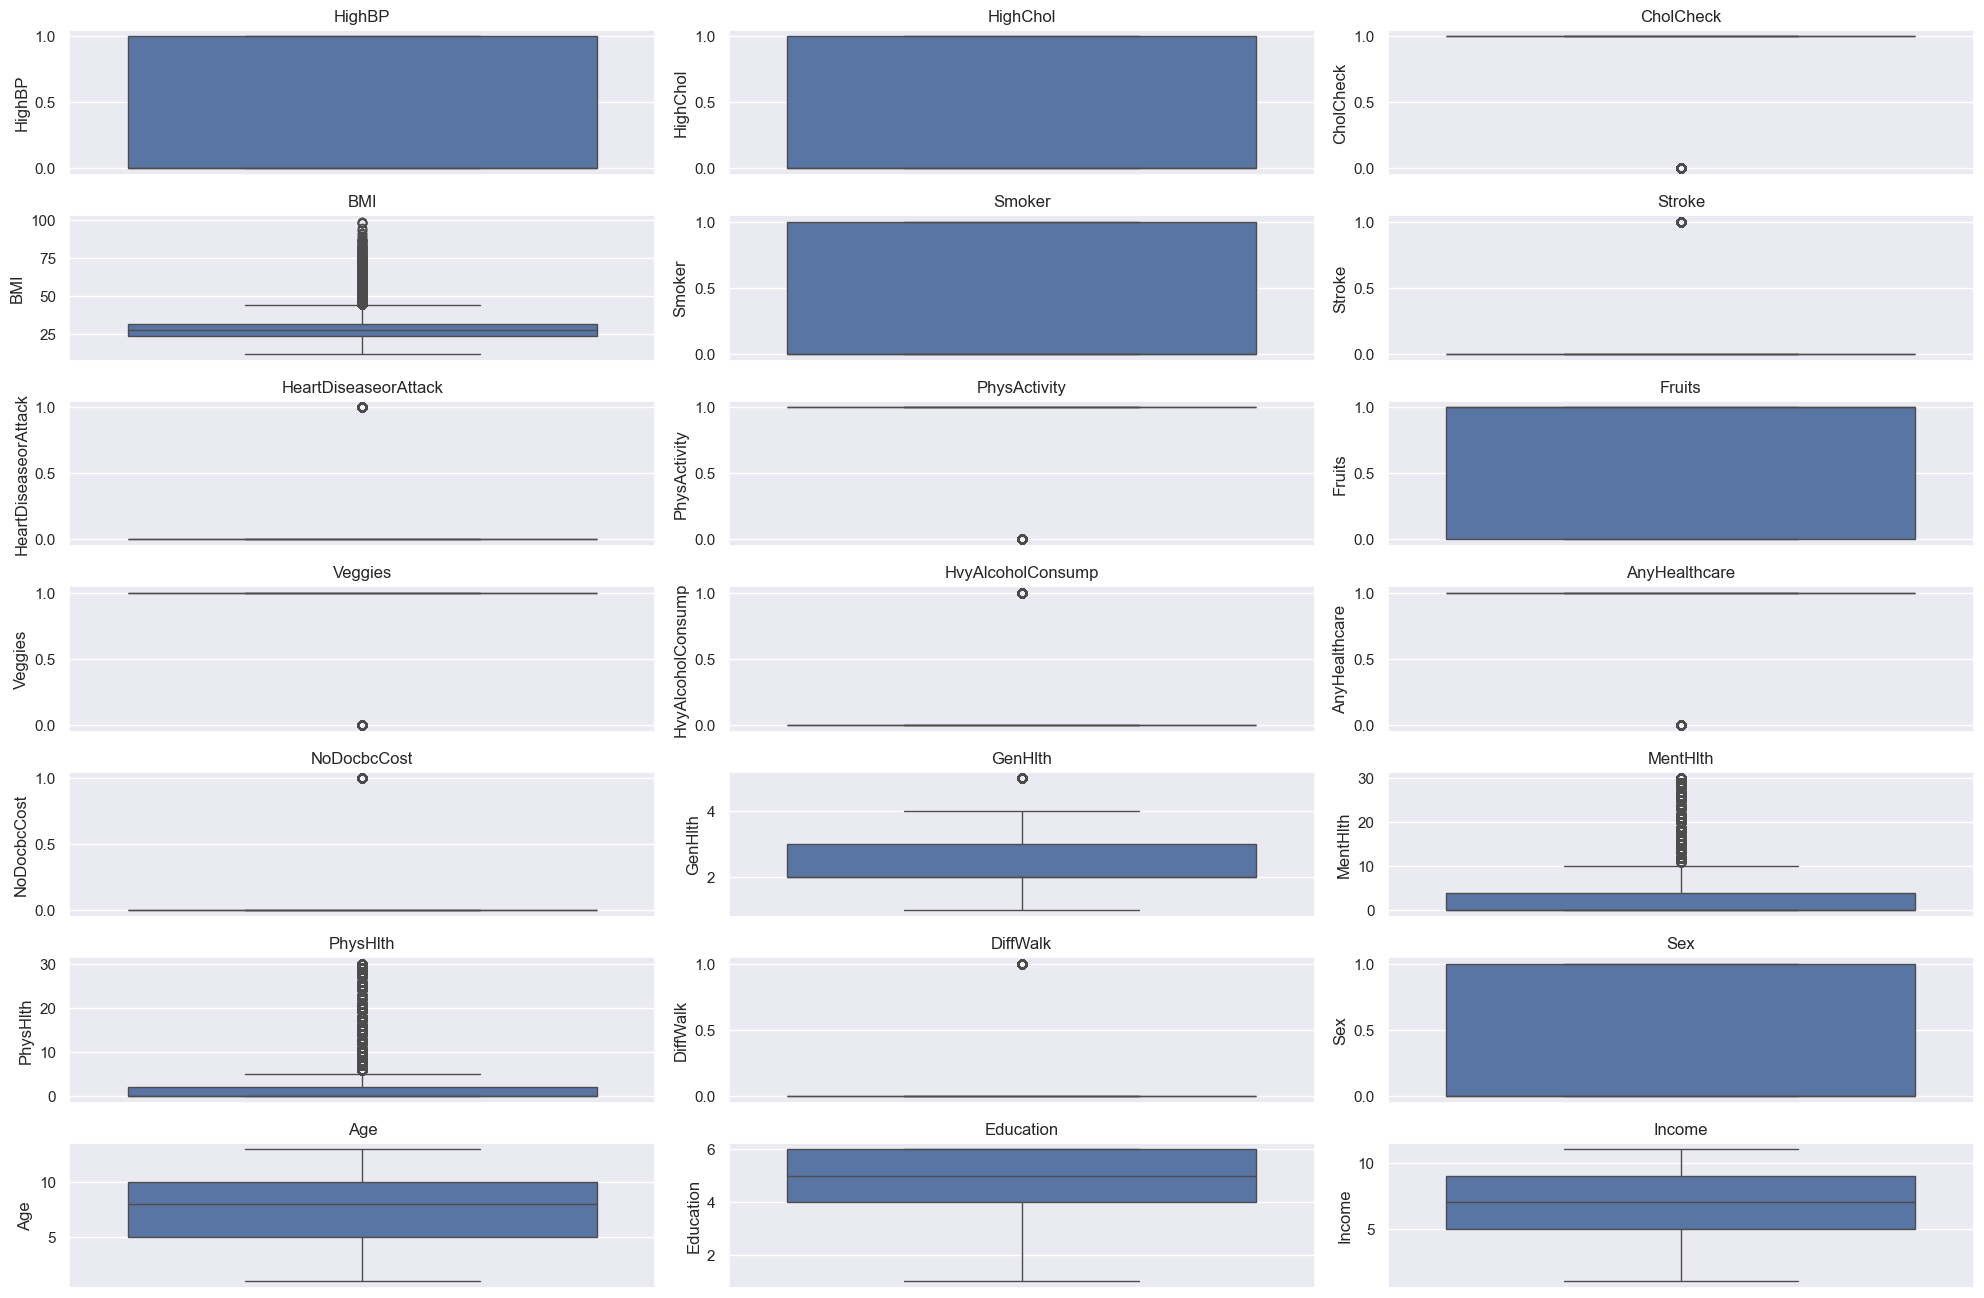

In [10]:
# Assuming `data` is your DataFrame
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Remove 'Diabetes_012' from the list of numerical columns
numerical_columns = numerical_columns.drop('Diabetes_012')

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.boxplot(data[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

1. HighBP, HighChol, Smoker, PhysActivity, HvyAlcoholConsume, AnyHealthcare, Veggies, NoDocbcCost, DiffWalk, Sex:
- Variabel-variabel ini tampaknya bersifat biner atau kategorikal (nilainya sebagian besar 0 dan 1), sehingga plot kotak tidak menunjukkan banyak variabilitas.
- Keberadaan pencilan ditunjukkan dengan lingkaran, tetapi karena ini adalah variabel biner, “pencilan” hanyalah kategori lainnya (0 atau 1).

2. BMI:
- Distribusi BMI memiliki rentang dari sekitar 15 hingga 100, dengan median sekitar 30.
- Ada beberapa pencilan, yang menunjukkan beberapa individu memiliki nilai BMI yang sangat tinggi.
- Rentang interkuartil (IQR) relatif kecil dibandingkan dengan rentang keseluruhan.

3. HeartDiseaseorAttack, Stroke, CholCheck:
- Variabel-variabel ini juga sebagian besar bersifat biner, dengan sangat sedikit kemunculan kondisi tersebut (pencilan adalah kasus minoritas).

4. Fruits, GenHlth:
- GenHlth memiliki rentang dari 1 hingga 5, dengan median sekitar 3.
- Variabel Fruits tampaknya sebagian besar bersifat biner, dengan nilai mayoritas dan minoritas sebagai pencilan.

5. MentHlth, PhysHlth:
- Kedua variabel menunjukkan distribusi dengan jumlah angka nol yang signifikan (kemungkinan mengindikasikan tidak ada masalah kesehatan mental atau fisik dalam 30 hari terakhir).
- Ada beberapa pencilan yang menunjukkan beberapa individu dengan nilai tinggi, yang menunjukkan bahwa mereka mengalami lebih banyak hari dengan kesehatan mental atau fisik yang buruk.

6. Age, Education, Income:
- Usia memiliki distribusi yang lebih luas dengan rentang dari sekitar 0 hingga 12, dengan sebagian besar nilai terkonsentrasi di antara 5 dan 10.
- Pendidikan berkisar antara 1 hingga 6, dengan median sekitar 4.
- Pendapatan berkisar antara 1 hingga 8, dengan median sekitar 5. Adanya outlier menunjukkan adanya variabilitas dalam tingkat pendapatan.

Berdasarkan pengamatan ini, terlihat bahwa sebagian besar variabel bersifat biner, yang membatasi jumlah variabilitas yang ditunjukkan dalam plot. Untuk variabel kontinu seperti BMI, MentHlth, PhysHlth, Usia, Pendidikan, dan Pendapatan, terdapat lebih banyak variabilitas dan adanya pencilan. Wawasan ini dapat membantu Anda memahami distribusi data Anda dan mengidentifikasi area di mana mungkin ada anomali atau kasus khusus yang perlu diselidiki lebih lanjut.

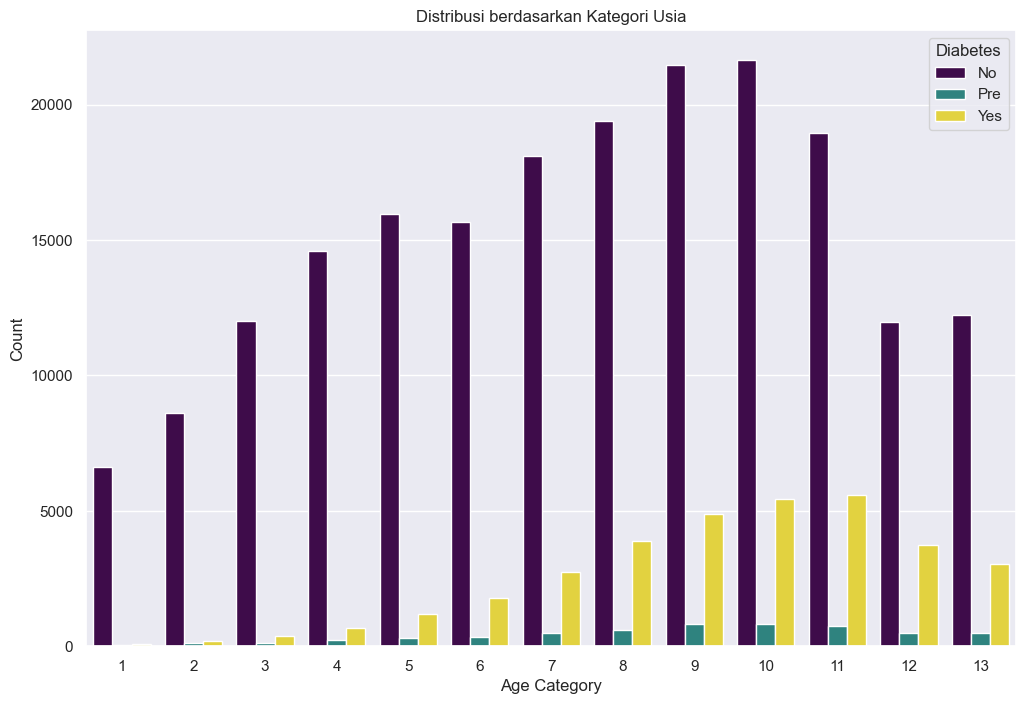

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Age', hue='Diabetes_012', palette='viridis')
plt.title('Distribusi berdasarkan Kategori Usia')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right', labels=["No", "Pre", "Yes"])
plt.show()

**Dominasi “Tidak Diabetes”:**

Di semua kategori usia, jumlah individu tanpa diabetes secara signifikan lebih tinggi dibandingkan dengan mereka yang memiliki pra-diabetes atau diabetes. Jumlah untuk “Tanpa Diabetes” tampaknya mencapai puncaknya di sekitar kategori usia menengah (8, 9, 10).

**Tren “Pra-diabetes” dan “Diabetes”:**

Jumlah individu yang didiagnosis dengan diabetes (Ya) dan pra-diabetes (Pre) relatif rendah dibandingkan dengan mereka yang tidak menderita diabetes.
Terdapat peningkatan yang nyata dalam jumlah kasus diabetes (Ya) mulai dari kategori usia 7 tahun ke atas. Kasus pra-diabetes (Pre) secara konsisten rendah di semua kategori usia, tetapi menunjukkan sedikit peningkatan pada kategori usia yang lebih tua.

**Kategori Usia dengan Risiko Lebih Tinggi:**

Kategori usia yang lebih tua (mulai dari kategori usia 7 dan seterusnya) menunjukkan peningkatan kasus diabetes (Ya). Hal ini menunjukkan bahwa individu yang lebih tua memiliki risiko yang lebih tinggi untuk didiagnosis diabetes. Distribusi ini menunjukkan tren di mana probabilitas menderita diabetes meningkat seiring bertambahnya usia.

**Area Fokus Potensial untuk Intervensi Kesehatan:**

Intervensi kesehatan dan program kesadaran harus secara khusus menargetkan kelompok usia yang lebih tua di mana risiko diabetes lebih tinggi. Deteksi dini dan tindakan pencegahan pada kelompok usia paruh baya (kategori usia 7-10 tahun) dapat membantu mengelola dan mengurangi kejadian diabetes seiring bertambahnya usia.

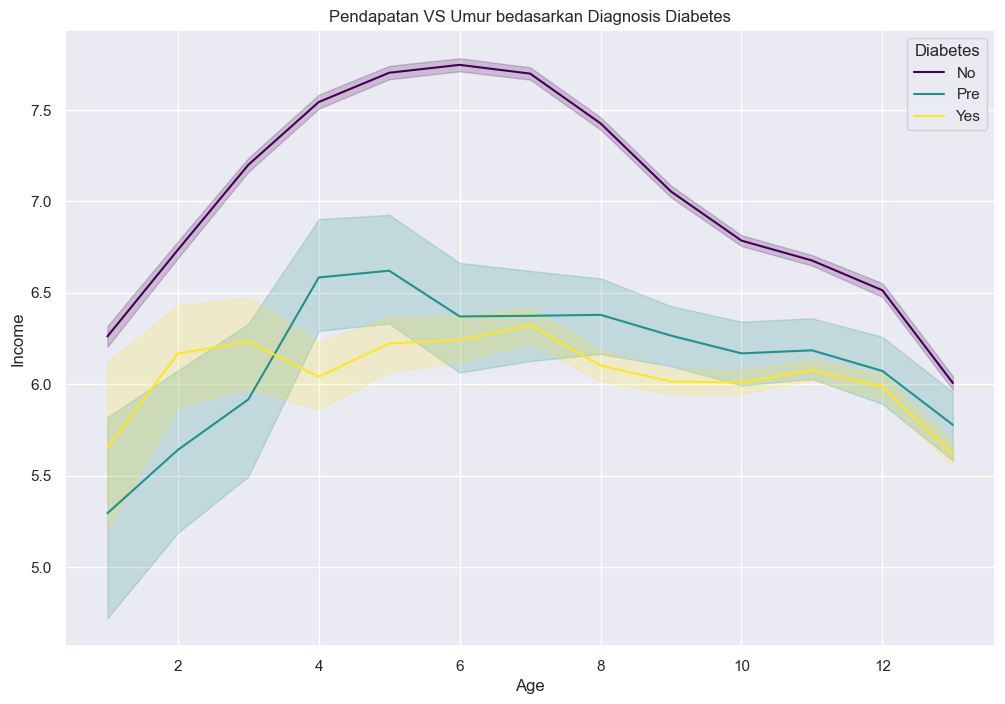

In [12]:
custom_labels = {0.0: "No", 1.0: "Pre", 2.0: "Yes"}

plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='Age', y='Income', hue='Diabetes_012', palette='viridis')
plt.title('Pendapatan VS Umur bedasarkan Diagnosis Diabetes')

legend = plt.legend(title='Diabetes', loc='upper right')
for text in legend.get_texts():
    original_label = float(text.get_text())
    text.set_text(custom_labels[original_label])

plt.show()

**Pendapatan Tertinggi di Usia Pertengahan:**

- Terlihat bahwa pendapatan rata-rata mencapai puncaknya pada usia kategori 7 hingga 10 untuk semua kelompok diagnosis (No, Pre, Yes). Setelah kategori usia tersebut, pendapatan rata-rata cenderung menurun.

**Perbedaan Berdasarkan Diagnosis Diabetes:**

- Kelompok tanpa diabetes (No) consistently memiliki pendapatan yang lebih tinggi dibandingkan dengan kelompok pre-diabetes (Pre) dan diabetes (Yes).
- Kelompok dengan diagnosis diabetes (Yes) memiliki pendapatan rata-rata yang lebih rendah dibandingkan dua kelompok lainnya.

**Variabilitas Pendapatan:**

- Pada kelompok tanpa diabetes (No), terdapat variabilitas yang lebih rendah dalam pendapatan dibandingkan dengan kelompok pre-diabetes (Pre) dan diabetes (Yes).
- Hal ini mungkin menunjukkan stabilitas finansial yang lebih tinggi di antara mereka yang tidak memiliki diabetes.

**Pengaruh Usia Terhadap Pendapatan:**

- Semua kelompok menunjukkan peningkatan pendapatan hingga usia pertengahan, kemudian mengalami penurunan.
- Penurunan pendapatan pada usia yang lebih tua lebih tajam pada kelompok dengan diabetes (Yes), yang menunjukkan kemungkinan dampak diabetes terhadap kemampuan untuk mempertahankan atau meningkatkan pendapatan di usia tua.

**Intervensi yang Diperlukan:**

- Program intervensi kesehatan dan dukungan finansial mungkin perlu difokuskan pada individu yang lebih tua dengan diagnosis diabetes untuk membantu mereka mempertahankan pendapatan.
- Peningkatan kesadaran dan program pencegahan diabetes pada usia yang lebih muda dapat membantu dalam meningkatkan stabilitas finansial di masa depan.

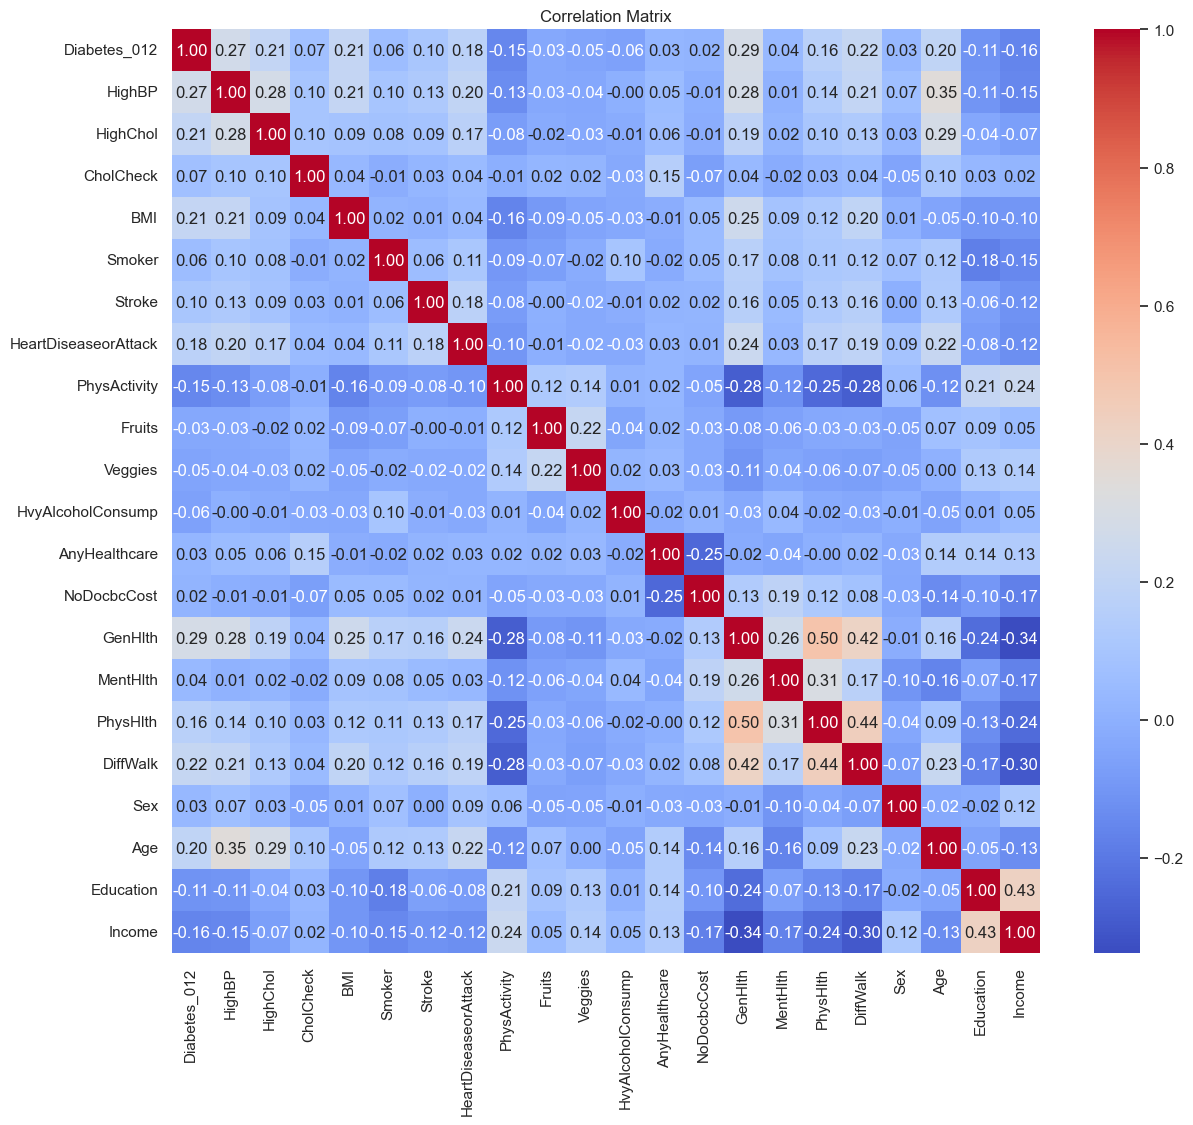

In [13]:
correlation_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Calculate the correlation of each feature with the target variable
correlation_with_target = correlation_matrix['Diabetes_012'].sort_values(ascending=False)

# Display the correlation with the target variable
print(correlation_with_target)

Diabetes_012            1.000000
GenHlth                 0.288377
HighBP                  0.269086
DiffWalk                0.216233
BMI                     0.211801
HighChol                0.207435
Age                     0.198600
HeartDiseaseorAttack    0.177432
PhysHlth                0.163922
Stroke                  0.102715
CholCheck               0.072222
Smoker                  0.058910
MentHlth                0.039154
Sex                     0.033815
AnyHealthcare           0.026366
NoDocbcCost             0.016355
Fruits                 -0.030489
Veggies                -0.047853
HvyAlcoholConsump      -0.058904
Education              -0.108539
PhysActivity           -0.151657
Income                 -0.160146
Name: Diabetes_012, dtype: float64


GenHlth dan Diabetes_012:
- Koefisien Korelasi: 0.288377

Ini menunjukkan hubungan positif yang moderat antara kesehatan umum dan status diabetes. Individu yang melaporkan kesehatan umum yang lebih buruk (nilai GenHlth yang lebih tinggi) cenderung memiliki kemungkinan yang lebih tinggi untuk didiagnosis diabetes (Diabetes_012). Sebaliknya, individu dengan kesehatan umum yang lebih baik (nilai GenHlth yang lebih rendah) cenderung lebih kecil kemungkinannya untuk didiagnosis diabetes.

**Interpretasi:**

Korelasi ini menunjukkan bahwa kesehatan umum merupakan faktor penting dalam keberadaan diabetes. Upaya untuk meningkatkan kesehatan dan kesejahteraan secara keseluruhan berpotensi mengurangi risiko diabetes. Intervensi kesehatan yang berfokus pada peningkatan metrik kesehatan umum, seperti olahraga teratur, diet sehat, dan pemeriksaan kesehatan secara teratur, dapat menjadi strategi yang efektif untuk pencegahan dan pengelolaan diabetes.

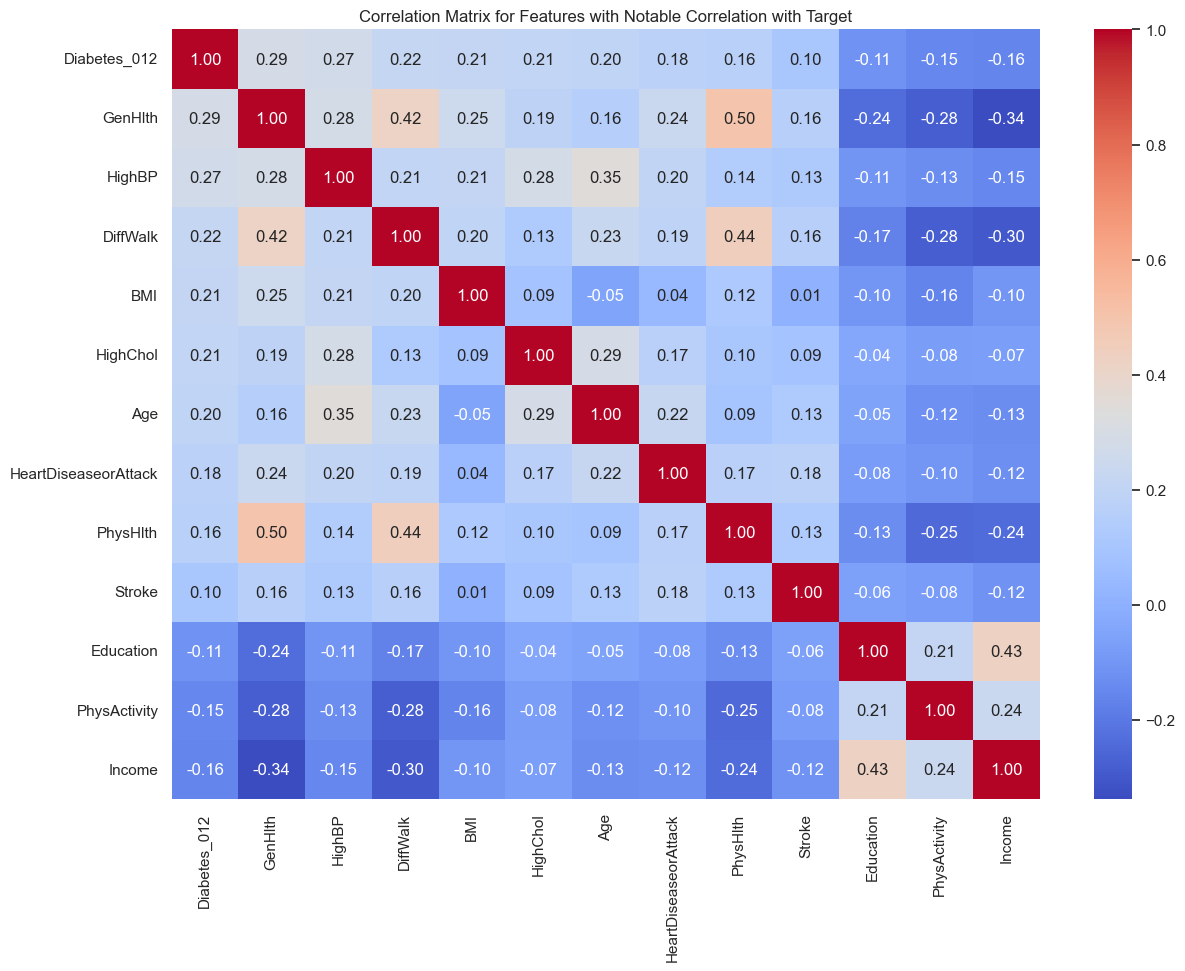

In [15]:
# Select features that have a notable correlation with the target variable
selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index.tolist()

# Plot heatmap for the selected features
plt.figure(figsize=(14, 10))
sns.heatmap(data[selected_features].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Features with Notable Correlation with Target')
plt.show()

Berdasarkan matriks korelasi yang telah ditampilkan, kita dapat menarik beberapa wawasan penting terkait variabel yang memiliki korelasi signifikan dengan variabel target Diabetes_012. Berikut adalah beberapa poin penting yang dapat diambil:

1. Korelasi antara Diabetes_012 dan GenHlth (Kesehatan Umum)
- Koefisien Korelasi: 0.29, Ada hubungan positif moderat antara kesehatan umum yang dilaporkan dan status diabetes. Semakin buruk kesehatan umum seseorang, semakin besar kemungkinan mereka memiliki diabetes.

2. Korelasi antara Diabetes_012 dan HighBP (Tekanan Darah Tinggi)
- Koefisien Korelasi: 0.27, Terdapat hubungan positif moderat antara tekanan darah tinggi dan diabetes. Individu dengan tekanan darah tinggi cenderung memiliki risiko lebih tinggi terkena diabetes.

3. Korelasi antara Diabetes_012 dan DiffWalk (Kesulitan Berjalan)
- Koefisien Korelasi: 0.22, Kesulitan berjalan juga menunjukkan korelasi positif dengan diabetes, meskipun tidak terlalu kuat. Ini menunjukkan bahwa diabetes dapat mempengaruhi mobilitas atau sebaliknya.

4. Korelasi antara Diabetes_012 dan BMI (Indeks Massa Tubuh)
- Koefisien Korelasi: 0.21, Ada hubungan positif antara BMI dan diabetes. Orang dengan BMI lebih tinggi cenderung memiliki risiko lebih besar untuk menderita diabetes.

5. Korelasi antara Diabetes_012 dan HighChol (Kolesterol Tinggi)
- Koefisien Korelasi: 0.21, Kolesterol tinggi juga berkorelasi dengan diabetes. Individu dengan kolesterol tinggi memiliki kecenderungan lebih besar untuk mengembangkan diabetes.

6. Korelasi antara Diabetes_012 dan Age (Usia)
- Koefisien Korelasi: 0.20, Usia menunjukkan korelasi positif dengan diabetes. Semakin tua usia seseorang, semakin tinggi kemungkinan mereka menderita diabetes.

7. Korelasi antara Diabetes_012 dan HeartDiseaseorAttack (Penyakit Jantung atau Serangan Jantung)
- Koefisien Korelasi: 0.18, Penyakit jantung juga menunjukkan hubungan dengan diabetes, meskipun tidak terlalu kuat. Ini menunjukkan adanya kemungkinan komorbiditas antara penyakit jantung dan diabetes.

8. Korelasi antara Diabetes_012 dan PhysHlth (Kesehatan Fisik)
- Koefisien Korelasi: 0.16, Kesehatan fisik yang buruk berkorelasi positif dengan diabetes, mengindikasikan bahwa orang dengan kesehatan fisik yang lebih buruk cenderung lebih berisiko untuk diabetes.

9. Korelasi Negatif
- Variabel seperti Education, PhysActivity, dan Income menunjukkan korelasi negatif dengan diabetes, yang berarti bahwa pendidikan yang lebih tinggi, 
aktivitas fisik yang lebih sering, dan pendapatan yang lebih tinggi berhubungan dengan risiko diabetes yang lebih rendah.

Untuk mengurangi risiko diabetes, intervensi yang fokus pada peningkatan kesehatan umum, manajemen tekanan darah, penurunan berat badan, dan kontrol kolesterol dapat sangat bermanfaat. Selain itu, meningkatkan aktivitas fisik, pendidikan tentang kesehatan, dan mendukung lingkungan yang meningkatkan kesejahteraan fisik secara keseluruhan dapat membantu mengurangi prevalensi diabetes di masyarakat.

Penting untuk mengidentifikasi individu yang berisiko tinggi berdasarkan faktor-faktor ini dan menyediakan program pencegahan dan manajemen yang tepat.

## **Data Prepocessing**

**Menghapus Features Yang Tidak Berpengaruh pada Modeling Uji-ANOVA**

In [16]:
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get the p-values
p_values = selector.pvalues_

# Create a DataFrame to hold feature names and their corresponding p-values
p_values_df = pd.DataFrame({'Feature': X.columns, 'P-Value': p_values})

# Filter features based on alpha level 0.05
significant_features = p_values_df[p_values_df['P-Value'] < 0.05]

print("Features with P-Value less than 0.05:")
print(significant_features)

Features with P-Value less than 0.05:
                 Feature        P-Value
0                 HighBP   0.000000e+00
1               HighChol   0.000000e+00
2              CholCheck  2.532704e-273
3                    BMI   0.000000e+00
4                 Smoker  1.728468e-179
5                 Stroke   0.000000e+00
6   HeartDiseaseorAttack   0.000000e+00
7           PhysActivity   0.000000e+00
8                 Fruits   9.583625e-50
9                Veggies  6.470957e-119
10     HvyAlcoholConsump  2.816023e-179
11         AnyHealthcare   1.621931e-40
12           NoDocbcCost   3.271758e-22
13               GenHlth   0.000000e+00
14              MentHlth   1.644115e-84
15              PhysHlth   0.000000e+00
16              DiffWalk   0.000000e+00
17                   Sex   3.675468e-62
18                   Age   0.000000e+00
19             Education   0.000000e+00
20                Income   0.000000e+00


Memilih fitur yang significant terhadap p-value

In [17]:
important_features = ['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

# Create a new DataFrame with only the important features
dataAnova = data[important_features].copy()

# Use .loc to avoid SettingWithCopyWarning
dataAnova['Diabetes_012'] = data['Diabetes_012'].copy()

# Display the new DataFrame
dataAnova.head()

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes_012
0,0,1.0,15.0,0.0,0.0,0,5.0,20.0,0.0,11,4.0,5.0,0.0
1,1,0.0,28.0,0.0,1.0,0,2.0,0.0,0.0,11,4.0,3.0,2.0
2,1,1.0,33.0,0.0,0.0,1,2.0,0.0,0.0,9,4.0,7.0,2.0
3,0,1.0,29.0,1.0,1.0,1,5.0,30.0,1.0,12,3.0,4.0,2.0
4,0,0.0,24.0,0.0,0.0,0,3.0,0.0,1.0,13,5.0,6.0,0.0


## **Model Development**

In [18]:
# Sort by 'GenHlth' to prioritize better health (lower values are better)
class_0_sorted = dataAnova[dataAnova['Diabetes_012'] == 0.0].sort_values(by='GenHlth').head(6000)
class_2_sorted = dataAnova[dataAnova['Diabetes_012'] == 2.0].sort_values(by='GenHlth').head(6000)

# Combine downsampled classes with class 1
balanced_data = pd.concat([class_0_sorted, class_2_sorted, dataAnova[dataAnova['Diabetes_012'] == 1.0]])

# Display the distribution of the new balanced data
print(balanced_data['Diabetes_012'].value_counts())

Diabetes_012
0.0    6000
2.0    6000
1.0    5619
Name: count, dtype: int64


In [19]:
# Separate features and target
X = balanced_data.drop('Diabetes_012', axis=1)
y = balanced_data['Diabetes_012']

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a single DataFrame
balanced_resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Display the distribution of the resampled balanced data
print(balanced_resampled_data['Diabetes_012'].value_counts())

Diabetes_012
0.0    6000
2.0    6000
1.0    6000
Name: count, dtype: int64


In [20]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_train_categorical = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_categorical = encoder.transform(y_test.values.reshape(-1, 1))

**Model FNN**

In [21]:
# Define the neural network model
model_FNN = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile the model
model_FNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_FNN = model_FNN.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2, class_weight={0: 1, 1: 1, 2: 1})

Epoch 1/50
360/360 [==============================] - 1s 2ms/step - loss: 0.8123 - accuracy: 0.6000 - val_loss: 0.5641 - val_accuracy: 0.7372
Epoch 2/50
360/360 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.7361 - val_loss: 0.4932 - val_accuracy: 0.7986
Epoch 3/50
360/360 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7773 - val_loss: 0.4685 - val_accuracy: 0.8066
Epoch 4/50
360/360 [==============================] - 0s 1ms/step - loss: 0.5009 - accuracy: 0.7951 - val_loss: 0.4609 - val_accuracy: 0.8118
Epoch 5/50
360/360 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7991 - val_loss: 0.4602 - val_accuracy: 0.8104
Epoch 6/50
360/360 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.8065 - val_loss: 0.4588 - val_accuracy: 0.8087
Epoch 7/50
360/360 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.8085 - val_loss: 0.4611 - val_accuracy: 0.8108
Epoch 

In [22]:
y_pred_FNN = model_FNN.predict(X_test)
y_pred_classes_FNN = y_pred_FNN.argmax(axis=1)
y_test_classes_FNN = np.argmax(y_test_categorical, axis=1)

# Calculate evaluation metrics
f1_FNN = f1_score(y_test_classes_FNN, y_pred_classes_FNN, average='weighted')
accuracy_FNN = accuracy_score(y_test_classes_FNN, y_pred_classes_FNN)

y_pred_percentages_FNN = y_pred_FNN * 100

# Create and display the results DataFrame
results_df_FNN = pd.DataFrame({
    'Predicted Probability (%)': y_pred_percentages_FNN.max(axis=1),
    'Predicted Class': y_pred_classes_FNN,
})

# Display the evaluation metrics
print(f"F1 Score: {f1_FNN}")
print(f"Accuracy: {accuracy_FNN}")
print("Classification Report:")
print(classification_report(y_test_classes_FNN, y_pred_classes_FNN))

print(results_df_FNN.head(10))

113/113 [==============================] - 0s 594us/step
F1 Score: 0.8172151383647428
Accuracy: 0.8216666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1204
           1       1.00      0.63      0.77      1176
           2       0.73      0.84      0.79      1220

    accuracy                           0.82      3600
   macro avg       0.85      0.82      0.82      3600
weighted avg       0.85      0.82      0.82      3600

   Predicted Probability (%)  Predicted Class
0                  50.568562                0
1                  78.336922                2
2                  80.085823                2
3                  92.321655                0
4                  85.006401                0
5                  77.879105                2
6                  94.318787                0
7                  90.438148                0
8                  76.411736                2
9                  73

**Model LSTM**

In [23]:
# Reshape the data to 3D for RNN
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_train_categorical = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_categorical = encoder.transform(y_test.values.reshape(-1, 1))

In [24]:
# Define the RNN model with LSTM layers
model_LSTM = Sequential([
    LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    LSTM(128, activation='relu', return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    LSTM(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model_LSTM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history_LSTM = model_LSTM.fit(X_train, y_train_categorical, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
180/180 [==============================] - 4s 8ms/step - loss: 1.1033 - accuracy: 0.5429 - val_loss: 1.1527 - val_accuracy: 0.3413
Epoch 2/50
180/180 [==============================] - 1s 7ms/step - loss: 0.7135 - accuracy: 0.6983 - val_loss: 1.1127 - val_accuracy: 0.3566
Epoch 3/50
180/180 [==============================] - 1s 7ms/step - loss: 0.6166 - accuracy: 0.7513 - val_loss: 0.6327 - val_accuracy: 0.7583
Epoch 4/50
180/180 [==============================] - 1s 7ms/step - loss: 0.5801 - accuracy: 0.7660 - val_loss: 0.4872 - val_accuracy: 0.8087
Epoch 5/50
180/180 [==============================] - 1s 6ms/step - loss: 0.5572 - accuracy: 0.7824 - val_loss: 0.4799 - val_accuracy: 0.8076
Epoch 6/50
180/180 [==============================] - 1s 6ms/step - loss: 0.5349 - accuracy: 0.7860 - val_loss: 0.4734 - val_accuracy: 0.8066
Epoch 7/50
180/180 [==============================] - 1s 6ms/step - loss: 0.5287 - accuracy: 0.7929 - val_loss: 0.4719 - val_accuracy: 0.8066
Epoch 

In [25]:
# Evaluate the model
y_pred_LSTM = model_LSTM.predict(X_test)
y_pred_classes_LSTM = y_pred_LSTM.argmax(axis=1)
y_test_classes_LSTM = np.argmax(y_test_categorical, axis=1)

# Calculate evaluation metrics
f1 = f1_score(y_test_classes_LSTM, y_pred_classes_LSTM, average='weighted')
accuracy = accuracy_score(y_test_classes_LSTM, y_pred_classes_LSTM)

y_pred_percentages_LSTM = y_pred_LSTM * 100

# Create and display the results DataFrame
results_df_LSTM = pd.DataFrame({
    'Predicted Probability (%)': y_pred_percentages_LSTM.max(axis=1),
    'Predicted Class': y_pred_classes_LSTM,
})

# Display the evaluation metrics
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test_classes_LSTM, y_pred_classes_LSTM))

print(results_df_LSTM.head(10))

113/113 [==============================] - 1s 2ms/step
F1 Score: 0.8127208708302631
Accuracy: 0.8163888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1204
           1       1.00      0.62      0.77      1176
           2       0.72      0.86      0.78      1220

    accuracy                           0.82      3600
   macro avg       0.85      0.81      0.81      3600
weighted avg       0.85      0.82      0.81      3600

   Predicted Probability (%)  Predicted Class
0                  47.070499                0
1                  82.003395                2
2                  82.011780                2
3                  94.827446                0
4                  85.023636                0
5                  81.415436                2
6                  94.814354                0
7                  92.465820                0
8                  80.436958                2
9                  78.7

Perbandingan antara **model (FNN)** dan **model LSTM** menunjukkan bahwa kedua model tersebut memiliki kinerja yang sama dalam hal akurasi dan skor F1. Model FNN mencapai akurasi **81,24** dan nilai F1 **0,8172**, sedangkan model LSTM mencapai akurasi yang sedikit lebih rendah yaitu **81,05%** dan nilai F1 **0,8147**. Kedua model menunjukkan presisi dan recall yang tinggi untuk kelas 0, dengan model FNN sedikit mengungguli LSTM dalam hal recall untuk kelas 2 dan akurasi secara keseluruhan.

Dengan hasil ini, **Model FNN** tampaknya menjadi pilihan yang lebih baik karena akurasi dan nilai F1 yang sedikit lebih tinggi, yang mengindikasikan kinerja keseluruhan yang sedikit lebih baik dalam mengklasifikasikan dataset. Hal ini membuat model FNN menjadi pilihan yang lebih cocok untuk tugas khusus ini, karena memberikan klasifikasi yang lebih seimbang dan akurat di seluruh kelas yang berbeda.

Saving Model:

In [30]:
# # Save Model
# model_FNN.save('Model/fnn_model.h5')

# # Save the fitted scaler
# joblib_file = "Model/scaler_model.pkl"  
# joblib.dump(scaler, joblib_file)

# # Save the model to JSON
# model_json = model_FNN.to_json()
# with open('Model/model.json', 'w') as json_file:
#     json_file.write(model_json)

# # Saving model scaler
# # Extract scaler parameters
# scaler_info = {
#     'mean': scaler.mean_.tolist(),
#     'var': scaler.var_.tolist(),
#     'scale': scaler.scale_.tolist()
# }

# # Serialize to JSON
# json_file = "Model/scaler_model.json"
# with open(json_file, 'w') as file:
#     json.dump(scaler_info, file, indent=4)